In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

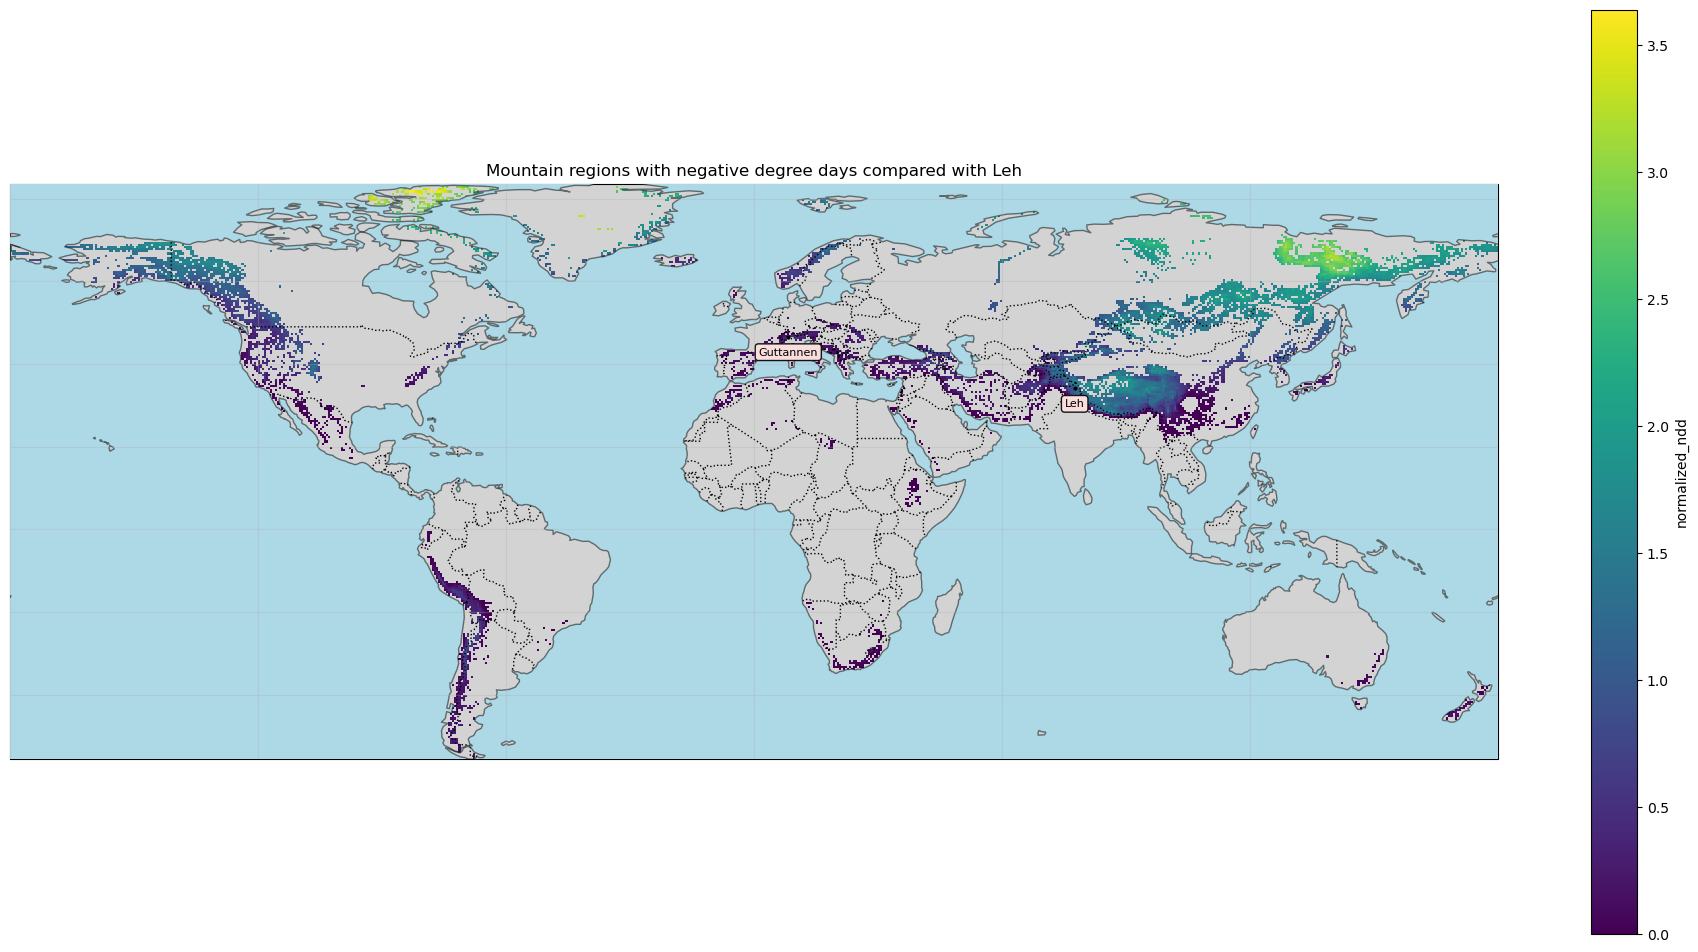

In [14]:
# Load the netCDF file
year = '2019'
dataset = xr.open_dataset('../output/mt+dis+temp+ndd.nc')
var = 'normalized_ndd'

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
nndd = dataset[var]

# Replace NDD values of 0 with NaN
nndd_masked = nndd.where(nndd != 0, np.nan)

# Set up the map projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(24,12))


# Plot nndd with the viridis colormap and color limits
cmap = plt.cm.viridis
cmap.set_bad('lightgrey')  # Set grey color for masked (invalid) values
norm = plt.Normalize(vmin=0, vmax=nndd.max().values)
nndd_masked.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

# Add map features
# Add country outlines
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
ax.coastlines(zorder=5, alpha=0.5)
ax.gridlines(zorder=5, alpha=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=4)

# Add a place marker for Leh
leh_coords = (34.163079280645604, 77.58554381044664)
ax.plot(leh_coords[1], leh_coords[0], marker='o', markersize=2, color='black', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(leh_coords[1], leh_coords[0]-5,'Leh', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'))

guttannen = (46.65589345308665, 8.29117716055342)
ax.plot(guttannen[1], guttannen[0], marker='o', markersize=2, color='black', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(guttannen[1], guttannen[0]-5,'Guttannen', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)

# Set title and show the plot
plt.title('Mountain regions with negative degree days compared with Leh')
# Save the figure
plt.savefig("../figs/mt_dis_wetbulb_ndd_layer.png", bbox_inches="tight", dpi=300)
plt.show()

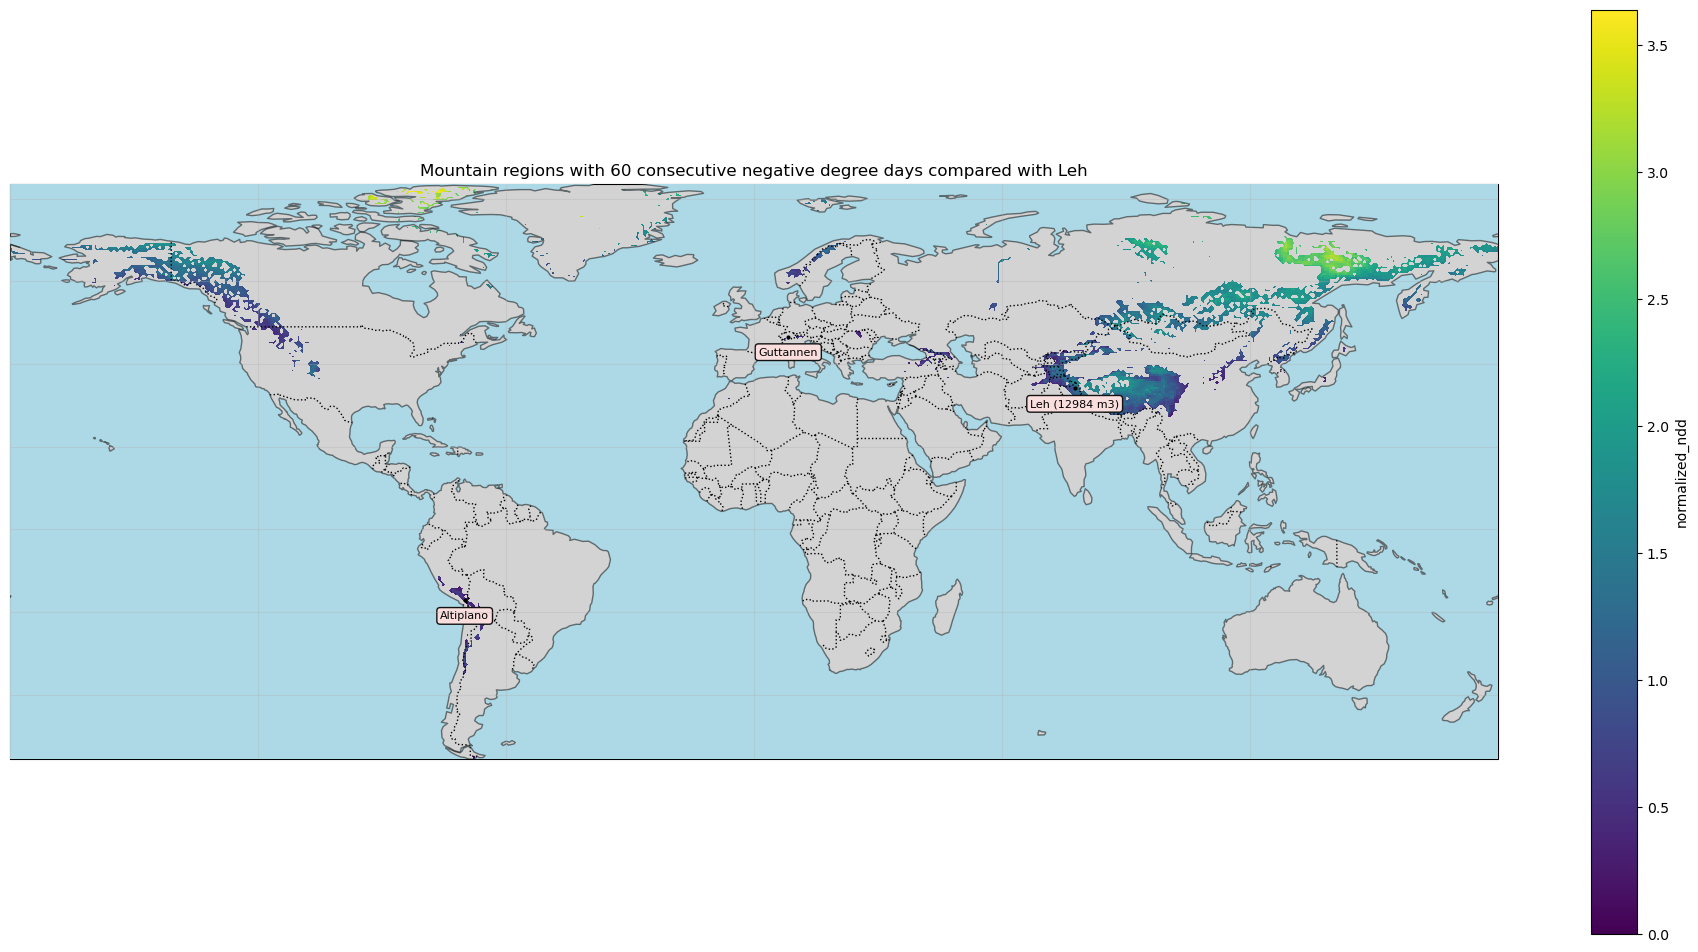

In [2]:
# Load the netCDF file
dataset = xr.open_dataset('../output/mt+dis+temp+ndd.nc')
var = 'normalized_ndd'

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
temperature = dataset['wet_temperature']
nndd = dataset[var]

# Set the window size
window_size = 60

# Define the threshold range
thresholds = np.arange(-2, -3, -1)

# Replace NDD values of 0 with NaN
nndd_masked = nndd.where(nndd != 0, np.nan)

# Set up the map projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(24,12))

# Iterate over each threshold and plot filled contour regions
for i in range(len(thresholds)):
    threshold = thresholds[i]
    mask = temperature < threshold
    
    # Apply consecutive days condition
    consecutive_days = np.zeros_like(mask, dtype=int)
    consecutive_days[0] = mask[0].astype(int)
    
    for t in range(1, len(mask)):
        consecutive_days[t] = mask[t].astype(int) * (consecutive_days[t-1] + 1)
    
    mask_consecutive = consecutive_days >= window_size
    
    mask_2d = np.any(mask_consecutive, axis=0)
    
    ax.contourf(lon, lat, mask_2d, colors=['lightgray', 'none'], transform=ccrs.PlateCarree(), zorder=2)


# Plot nndd with the viridis colormap and color limits
cmap = plt.cm.viridis
cmap.set_bad('lightgray')  # Set grey color for masked (invalid) values
norm = plt.Normalize(vmin=0, vmax=nndd.max().values)
nndd_masked.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

# Add map features
# Add country outlines
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black', zorder=4)
ax.coastlines(zorder=5, alpha=0.5)
ax.gridlines(zorder=5, alpha=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=4)

# Add a place marker for Leh
leh_coords = (34.163079280645604, 77.58554381044664)
ax.plot(leh_coords[1], leh_coords[0], marker='o', markersize=2, color='black', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(leh_coords[1], leh_coords[0]-5,'Leh (12984 m3)', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)

guttannen = (46.65589345308665, 8.29117716055342)
ax.plot(guttannen[1], guttannen[0], marker='o', markersize=2, color='black', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(guttannen[1], guttannen[0]-5,'Guttannen', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)
altiplano = (-17.14375, -69.997917)
ax.plot(altiplano[1], altiplano[0], marker='o', markersize=2, color='black', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(altiplano[1], altiplano[0]-5,'Altiplano', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)

# Set title and show the plot
plt.title('Mountain regions with ' + str(window_size) + ' consecutive negative degree days compared with Leh')
# Save the figure
plt.savefig("../figs/mt_dis_wetbulb_consecutive_ndd_layer.png", bbox_inches="tight", dpi=300)
plt.show()

In [25]:
print("Transcend location is " + str(round(float(dataset.sel(lat=altiplano[0], lon=altiplano[1], method='nearest').normalized_ndd.values), 2)) + " times Leh")
print("Guttannen location is " + str(round(float(dataset.sel(lat=guttannen[0], lon=guttannen[1], method='nearest').normalized_ndd.values), 2)) + " times Leh")

Transcend location is 0.58 times Leh
Guttannen location is 0.33 times Leh


In [28]:
dataset.normalized_ndd.values.max()

3.638776

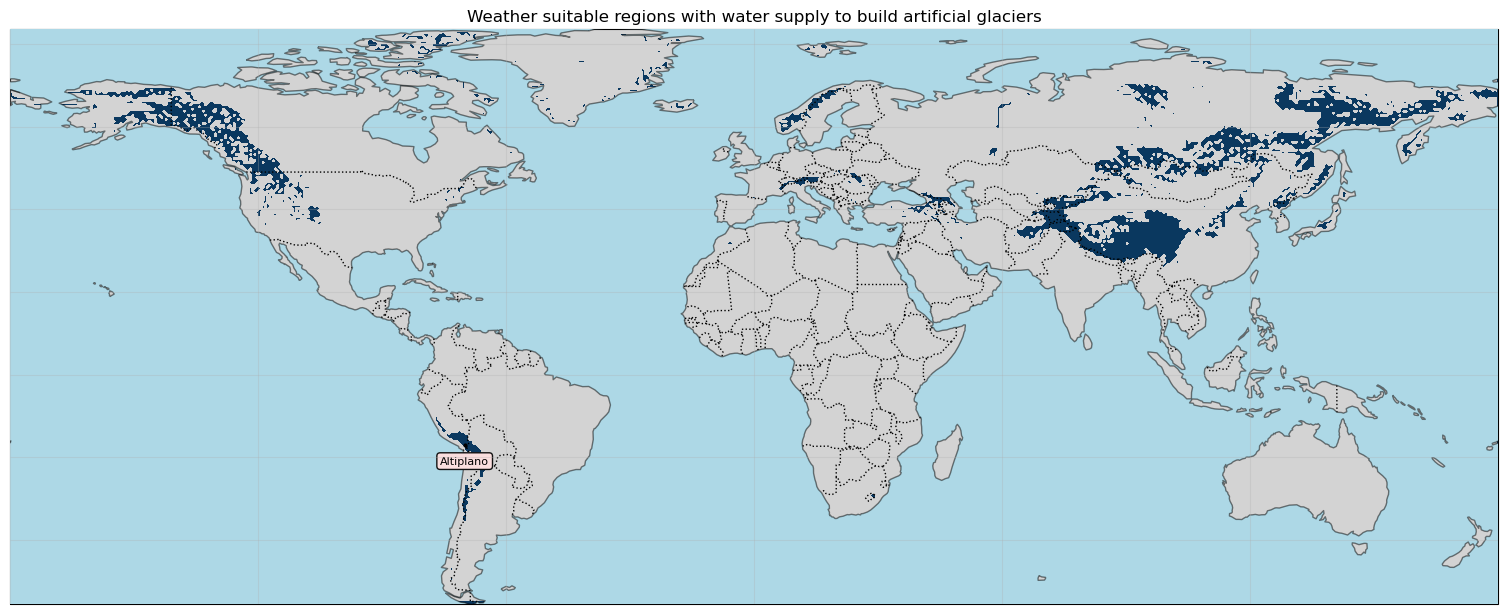

In [22]:
# Load the netCDF file
dataset = xr.open_dataset('../output/mt+dis+temp+ndd.nc')
var = 'normalized_ndd'

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
temperature = dataset['wet_temperature']
nndd = dataset[var]

# Set the window size
window_size = 30

# Define the threshold range
thresholds = np.arange(-2, -3, -1)

# Replace NDD values of 0 with NaN
nndd_masked = nndd.where(nndd != 0, np.nan)

# Set up the map projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(24,12))

# Iterate over each threshold and plot filled contour regions
for i in range(len(thresholds)):
    threshold = thresholds[i]
    mask = temperature < threshold
    
    # Apply consecutive days condition
    consecutive_days = np.zeros_like(mask, dtype=int)
    consecutive_days[0] = mask[0].astype(int)
    
    for t in range(1, len(mask)):
        consecutive_days[t] = mask[t].astype(int) * (consecutive_days[t-1] + 1)
    
    mask_consecutive = consecutive_days >= window_size
    
    mask_2d = np.any(mask_consecutive, axis=0)
    
    ax.contourf(lon, lat, mask_2d, colors=['lightgray', 'none'], transform=ccrs.PlateCarree(), zorder=2)


# Plot nndd with the viridis colormap and color limits
#cmap = plt.cm.viridis
#cmap.set_bad('lightgray')  # Set grey color for masked (invalid) values
#norm = plt.Normalize(vmin=0, vmax=nndd.max().values)
nndd_masked.plot(ax=ax, transform=ccrs.PlateCarree(), color='#0a385f')

# Add map features
# Add country outlines
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black', zorder=4)
ax.coastlines(zorder=5, alpha=0.5)
ax.gridlines(zorder=5, alpha=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=4)



#Remove colobar
fig.delaxes(fig.axes[1])

# Set title and show the plot
plt.title('Weather suitable regions with water supply to build artificial glaciers')
# Save the figure
plt.savefig("../figs/AG_locs.png", bbox_inches="tight", dpi=300)
plt.show()

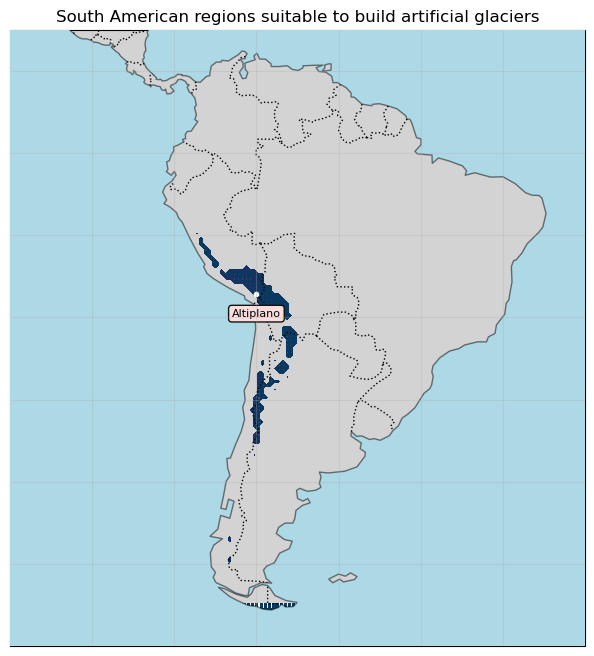

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the netCDF file
dataset = xr.open_dataset('../output/mt+dis+temp+ndd.nc')
var = 'normalized_ndd'

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
temperature = dataset['wet_temperature']
nndd = dataset[var]

# Set the window size
window_size = 30

# Define the threshold range
thresholds = np.arange(-2, -3, -1)

# Replace NDD values of 0 with NaN
nndd_masked = nndd.where(nndd != 0, np.nan)

# Set up the map projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(10, 8))

# Set the extent to zoom into South America
ax.set_extent([-100, -30, -60, 15], crs=ccrs.PlateCarree())

# Iterate over each threshold and plot filled contour regions
for i in range(len(thresholds)):
    threshold = thresholds[i]
    mask = temperature < threshold

    # Apply consecutive days condition
    consecutive_days = np.zeros_like(mask, dtype=int)
    consecutive_days[0] = mask[0].astype(int)

    for t in range(1, len(mask)):
        consecutive_days[t] = mask[t].astype(int) * (consecutive_days[t - 1] + 1)

    mask_consecutive = consecutive_days >= window_size

    mask_2d = np.any(mask_consecutive, axis=0)

    ax.contourf(lon, lat, mask_2d, colors=['lightgray', 'none'], transform=ccrs.PlateCarree(), zorder=2)

# Scatter plot of longitude and latitude with blue color
nndd_masked.plot(ax=ax, transform=ccrs.PlateCarree(), color='#0a385f')

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black', zorder=4)
ax.coastlines(zorder=5, alpha=0.5)
ax.gridlines(zorder=5, alpha=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=4)

altiplano = (-17.14375, -69.997917)
ax.plot(altiplano[1], altiplano[0], marker='o', markersize=3, color='white', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(altiplano[1], altiplano[0]-3,'Altiplano', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)
#Remove colobar
fig.delaxes(fig.axes[1])

# Set title and show the plot
plt.title('South American regions suitable to build artificial glaciers')

# Save the figure
plt.savefig("../figs/SA_AG_locs.png", bbox_inches="tight", dpi=300)
plt.show()

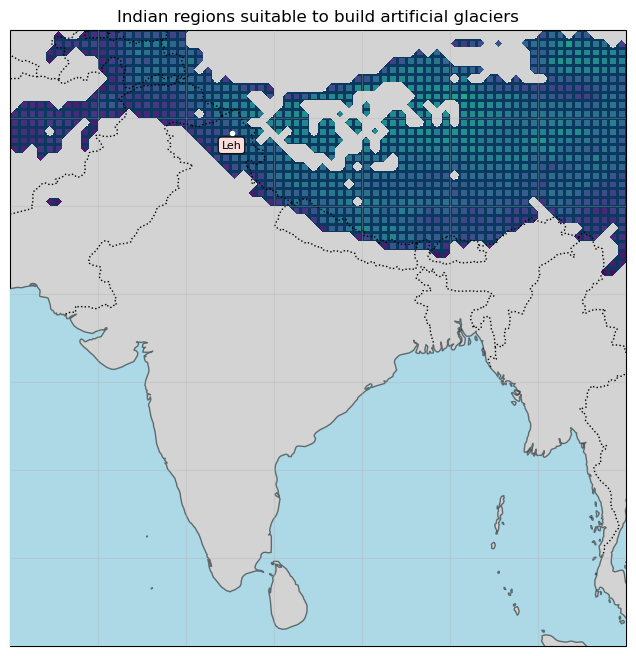

In [15]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the netCDF file
dataset = xr.open_dataset('../output/mt+dis+temp+ndd.nc')
var = 'normalized_ndd'

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
temperature = dataset['wet_temperature']
nndd = dataset[var]

# Set the window size
window_size = 30

# Define the threshold range
thresholds = np.arange(-2, -3, -1)

# Replace NDD values of 0 with NaN
nndd_masked = nndd.where(nndd != 0, np.nan)

# Set up the map projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(10, 8))

# Set the extent to zoom into India
ax.set_extent([65, 100, 5, 40], crs=ccrs.PlateCarree())

# Iterate over each threshold and plot filled contour regions
for i in range(len(thresholds)):
    threshold = thresholds[i]
    mask = temperature < threshold

    # Apply consecutive days condition
    consecutive_days = np.zeros_like(mask, dtype=int)
    consecutive_days[0] = mask[0].astype(int)

    for t in range(1, len(mask)):
        consecutive_days[t] = mask[t].astype(int) * (consecutive_days[t - 1] + 1)

    mask_consecutive = consecutive_days >= window_size

    mask_2d = np.any(mask_consecutive, axis=0)

    ax.contourf(lon, lat, mask_2d, colors=['lightgray', 'none'], transform=ccrs.PlateCarree(), zorder=2)

# Scatter plot of longitude and latitude with blue color
nndd_masked.plot(ax=ax, transform=ccrs.PlateCarree(), color='#0a385f')

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black', zorder=4)
ax.coastlines(zorder=5, alpha=0.5)
ax.gridlines(zorder=5, alpha=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=4)

# Add a place marker for Leh
leh_coords = (34.163079280645604, 77.58554381044664)
ax.plot(leh_coords[1], leh_coords[0], marker='o', markersize=3, color='white', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(leh_coords[1], leh_coords[0]-1,'Leh', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)
#Remove colobar
fig.delaxes(fig.axes[1])

# Set title and show the plot
plt.title('Indian regions suitable to build artificial glaciers')

# Save the figure
plt.savefig("../figs/India_AG_locs.png", bbox_inches="tight", dpi=300)
plt.show()

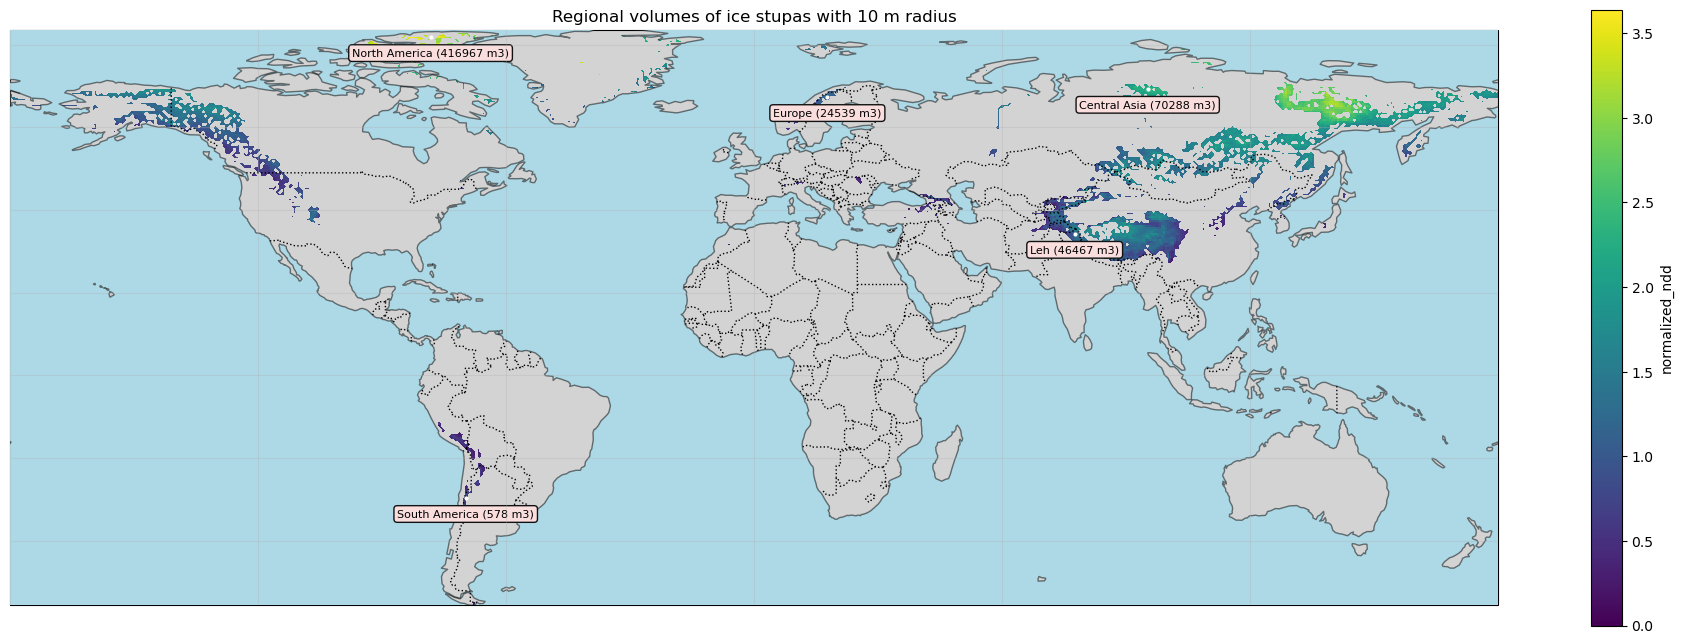

In [17]:
# Load the netCDF file
dataset = xr.open_dataset('../output/mt+dis+temp+ndd.nc')
var = 'normalized_ndd'

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
temperature = dataset['wet_temperature']
nndd = dataset[var]

# Set the window size
window_size = 60

# Define the threshold range
thresholds = np.arange(-2, -3, -1)

# Replace NDD values of 0 with NaN
nndd_masked = nndd.where(nndd != 0, np.nan)

# Set up the map projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(24,8))

# Iterate over each threshold and plot filled contour regions
for i in range(len(thresholds)):
    threshold = thresholds[i]
    mask = temperature < threshold
    
    # Apply consecutive days condition
    consecutive_days = np.zeros_like(mask, dtype=int)
    consecutive_days[0] = mask[0].astype(int)
    
    for t in range(1, len(mask)):
        consecutive_days[t] = mask[t].astype(int) * (consecutive_days[t-1] + 1)
    
    mask_consecutive = consecutive_days >= window_size
    
    mask_2d = np.any(mask_consecutive, axis=0)
    
    ax.contourf(lon, lat, mask_2d, colors=['lightgray', 'none'], transform=ccrs.PlateCarree(), zorder=2)


# Plot nndd with the viridis colormap and color limits
cmap = plt.cm.viridis
cmap.set_bad('lightgray')  # Set grey color for masked (invalid) values
norm = plt.Normalize(vmin=0, vmax=nndd.max().values)
nndd_masked.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

# Add map features
# Add country outlines
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black', zorder=4)
ax.coastlines(zorder=5, alpha=0.5)
ax.gridlines(zorder=5, alpha=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=4)

# Add a place marker for Leh
leh_coords = (34.163079280645604, 77.58554381044664)
ax.plot(leh_coords[1], leh_coords[0], marker='o', markersize=2, color='white', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(leh_coords[1], leh_coords[0]-5,'Leh (46467 m3)', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)

north_america = (81.75, -78.25)
ax.plot(north_america[1], north_america[0], marker='o', markersize=2, color='white', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(north_america[1], north_america[0]-5,'North America (416967 m3)', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)
south_america = (-29.75, -69.75)
ax.plot(south_america[1], south_america[0], marker='o', markersize=2, color='white', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(south_america[1], south_america[0]-5,'South America (578 m3)', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)

central_asia = (69.25, 95.25)
ax.plot(central_asia[1], central_asia[0], marker='o', markersize=2, color='white', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(central_asia[1], central_asia[0]-5,'Central Asia (70288 m3)', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)

europe = (67.25, 17.75)
ax.plot(europe[1], europe[0], marker='o', markersize=2, color='white', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(europe[1], europe[0]-5,'Europe (24539 m3)', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)

# Set title and show the plot
plt.title('Regional volumes of ice stupas with 10 m radius')
# Save the figure
plt.savefig("../figs/regional_vol_layer.png", bbox_inches="tight", dpi=300)
plt.show()